In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, LinearModel, HierarchialLinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, opponent_feature_names, visualize=False, num_players=580)
train_loader, test_loader, _ = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fa262bbf820>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa262e8ad30>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)
player_linear_score_model = LinearModel(player_feature_names, opponent_feature_names)
player_opponent_linear_score_model = LinearModel(player_feature_names, opponent_feature_names, use_opponent_features=True)
heirarchial_linear_model = HierarchialLinearModel(player_feature_names, opponent_feature_names)

player_linear_score_model.fit(train_loader)
player_opponent_linear_score_model.fit(train_loader)
heirarchial_linear_model.fit(train_loader)
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))
print(player_opponent_linear_score_model.eval(test_loader))
print(heirarchial_linear_model.eval(test_loader))

None
None
None
0.9091191084113643
SpearmanrResult(correlation=0.5729554454098544, pvalue=3.436386203349804e-300)
0.769391227658544
SpearmanrResult(correlation=0.5947764331469458, pvalue=0.0)
0.5754709070129523
SpearmanrResult(correlation=0.6137443392304899, pvalue=0.0)
0.5761899322357459
SpearmanrResult(correlation=0.6013706163242797, pvalue=0.0)
0.5749588811679448
SpearmanrResult(correlation=0.6104584795306032, pvalue=0.0)


torch.Size([3449, 5, 4])


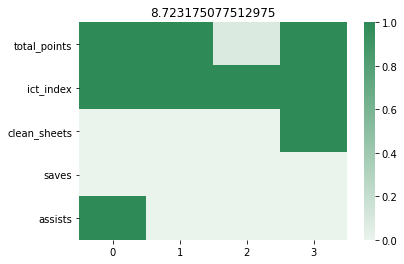

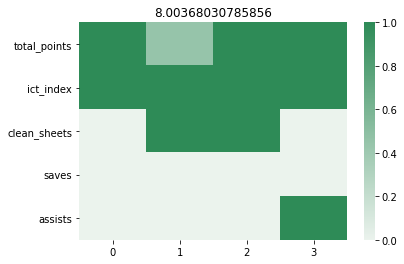

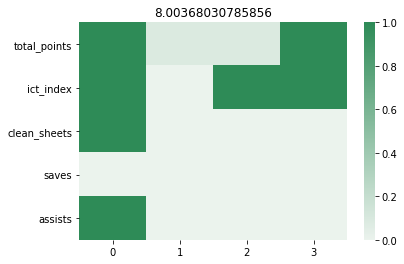

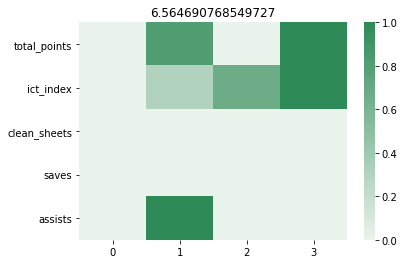

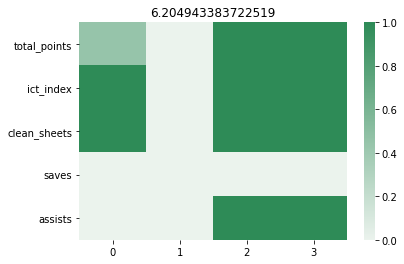

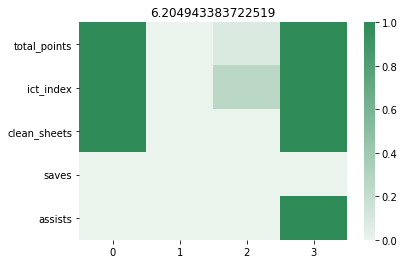

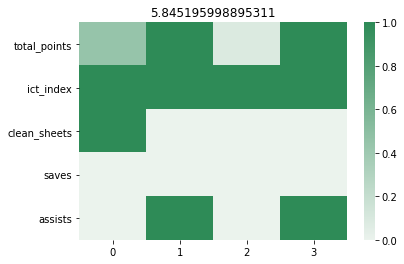

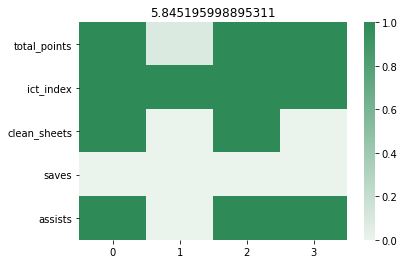

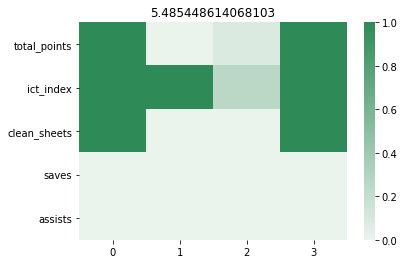

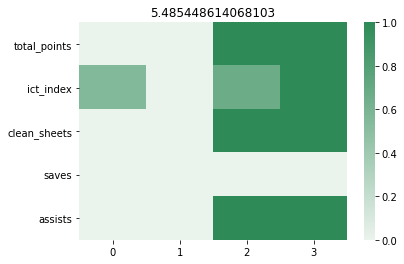

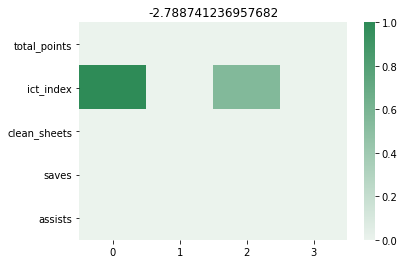

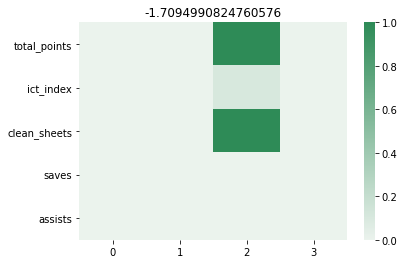

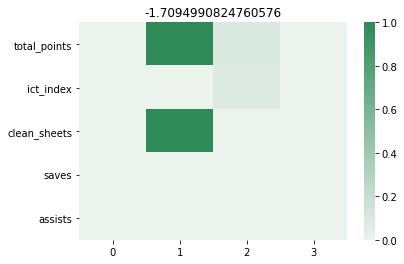

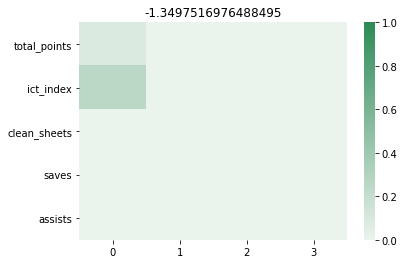

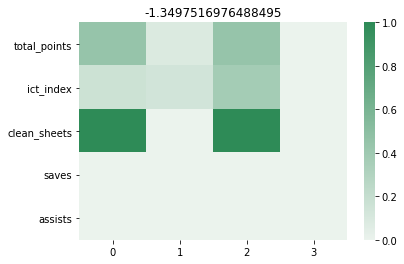

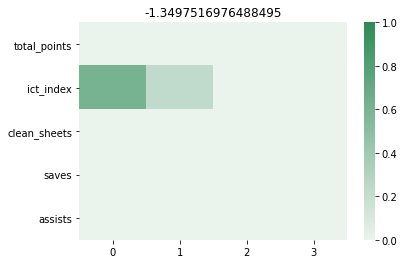

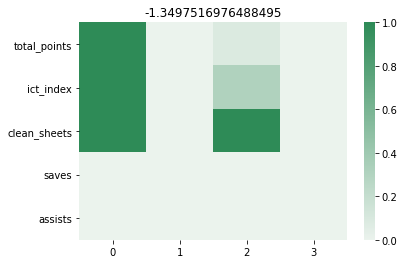

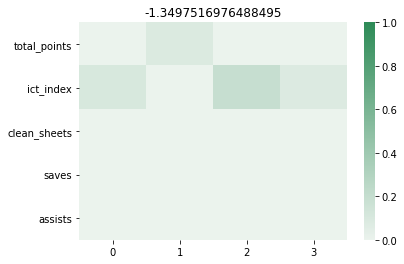

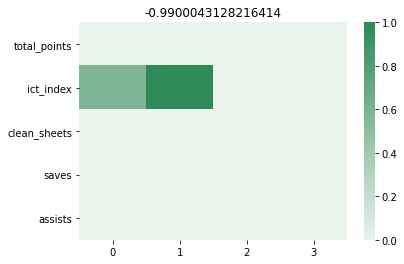

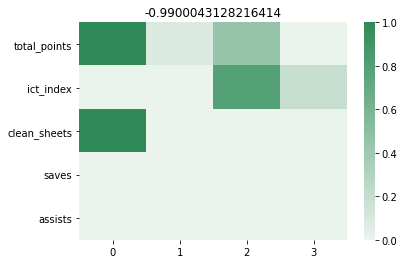

In [4]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3449, 5, 4])


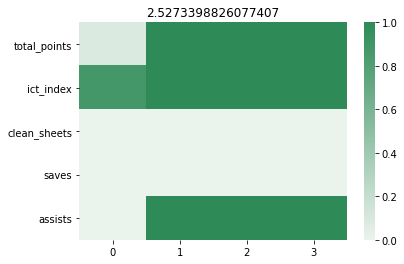

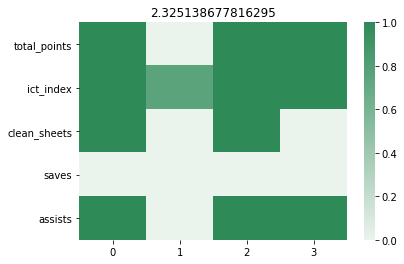

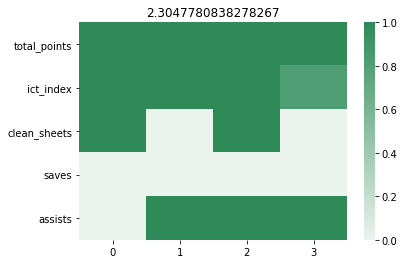

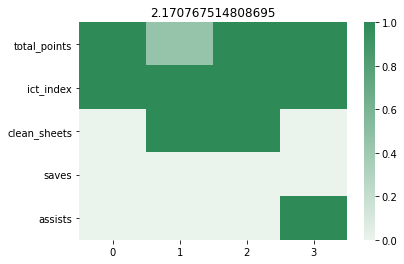

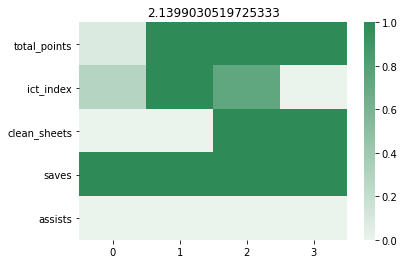

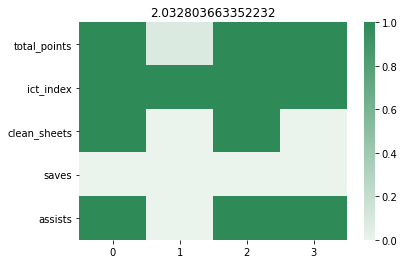

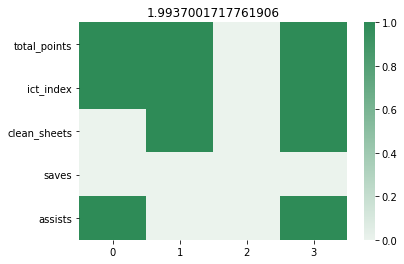

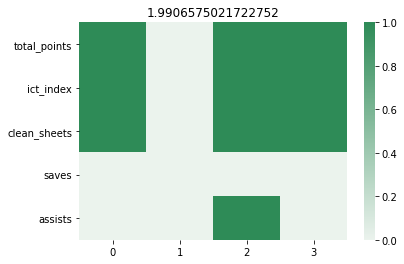

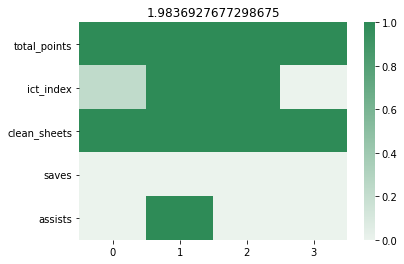

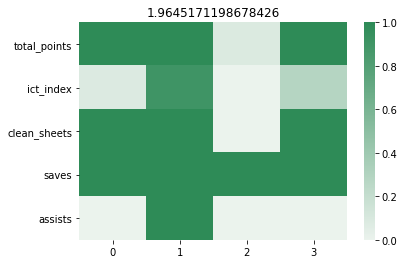

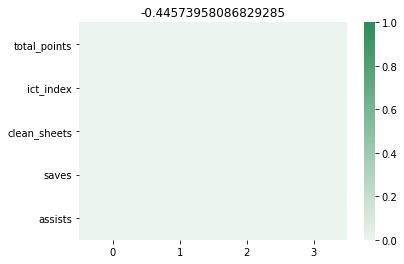

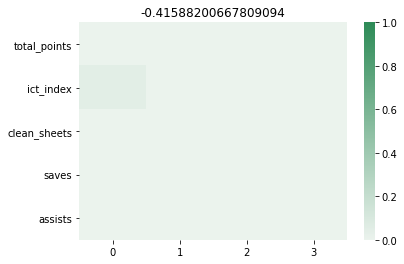

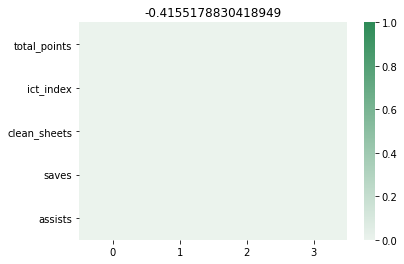

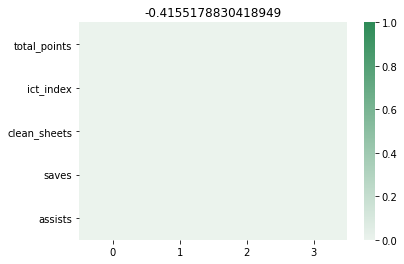

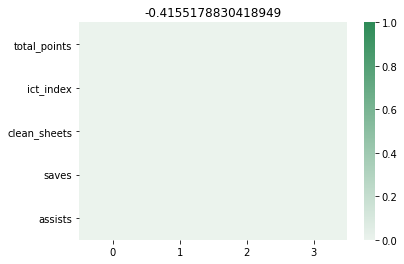

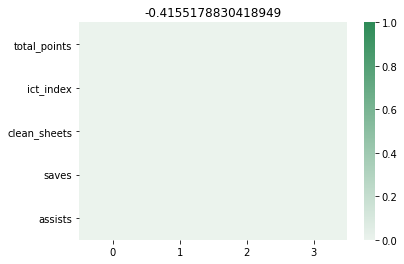

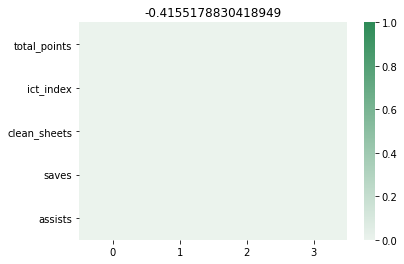

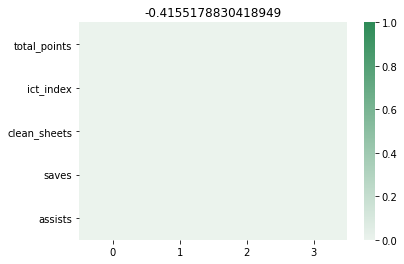

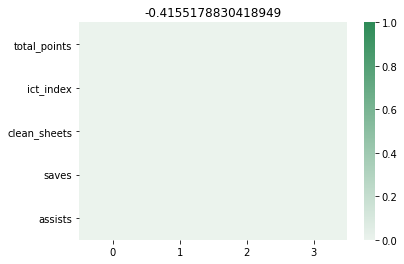

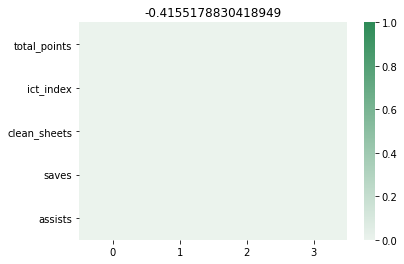

In [5]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3449, 5, 4])


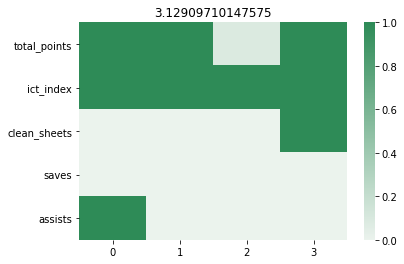

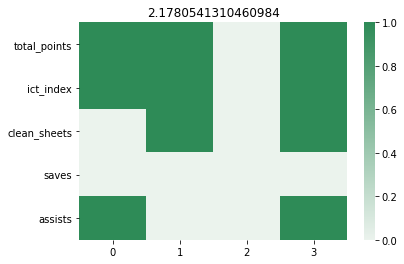

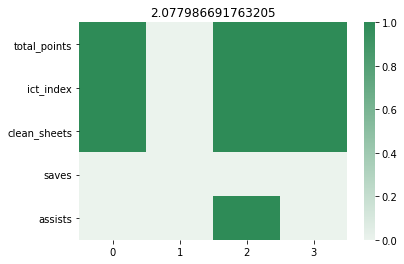

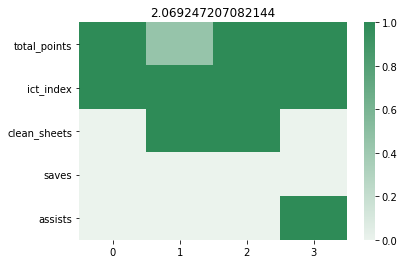

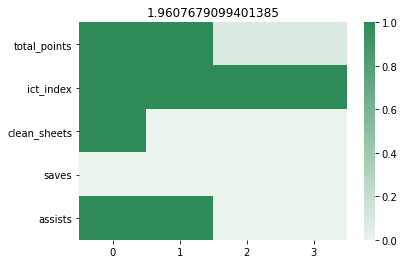

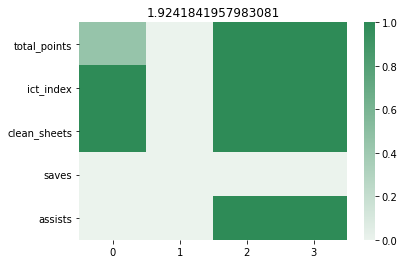

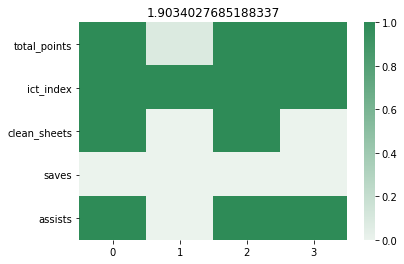

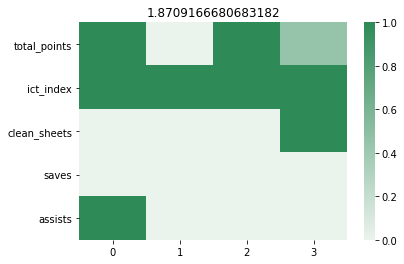

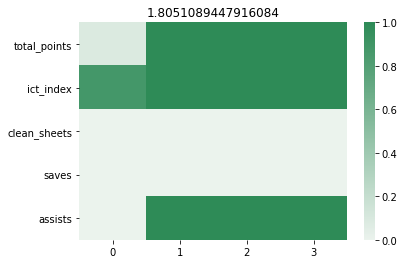

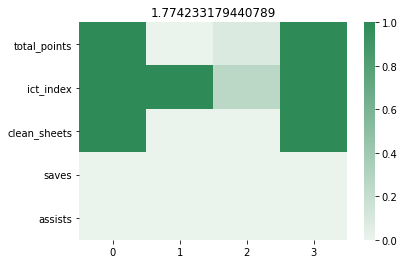

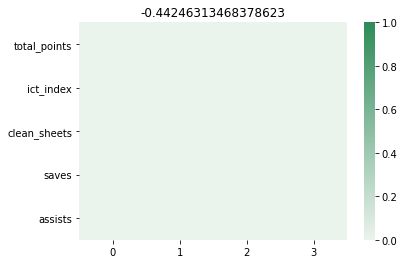

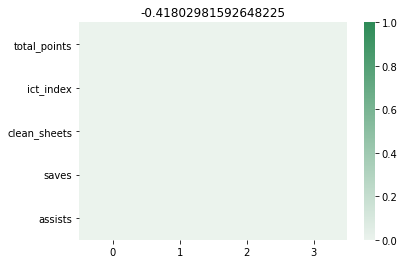

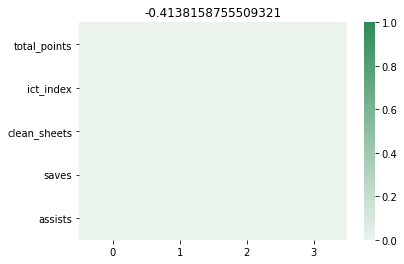

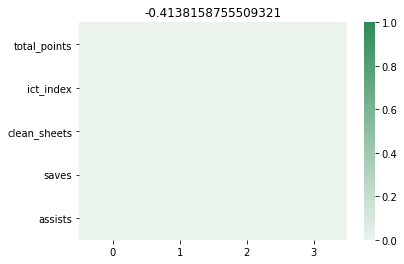

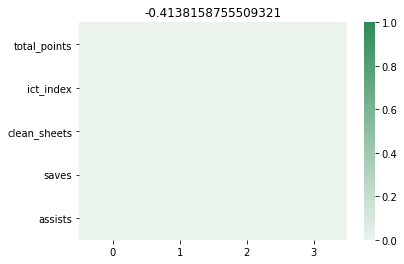

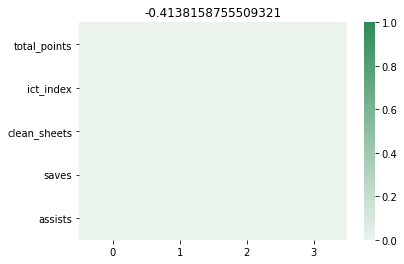

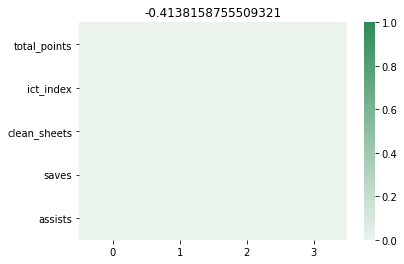

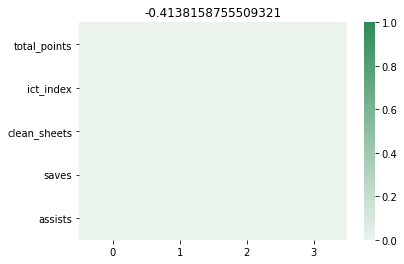

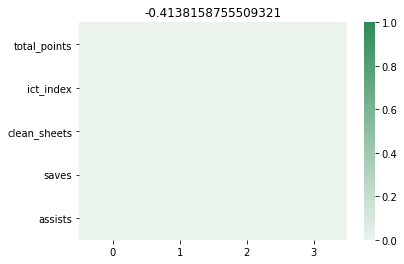

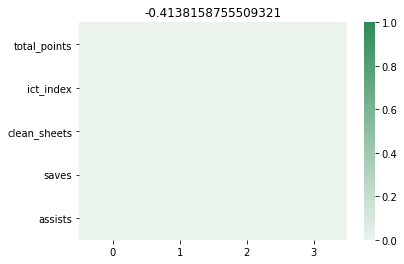

In [6]:
player_linear_score_model.visualize_predictions(test_loader)

torch.Size([3449, 20])


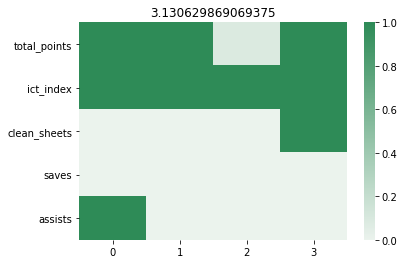

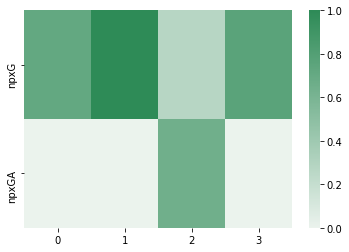

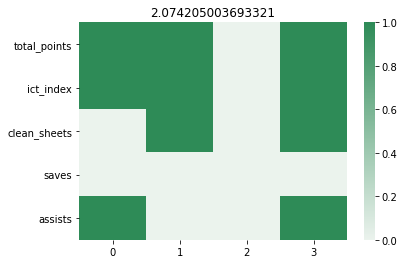

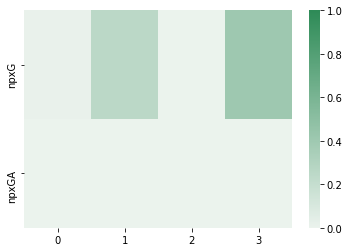

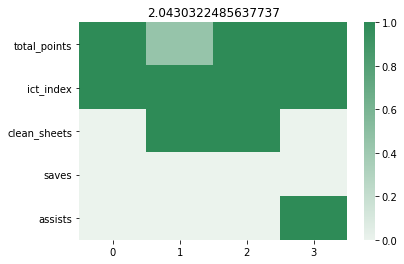

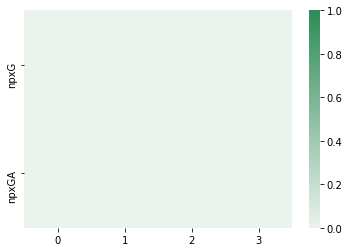

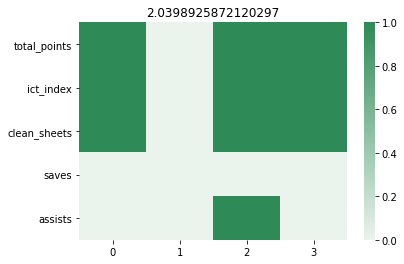

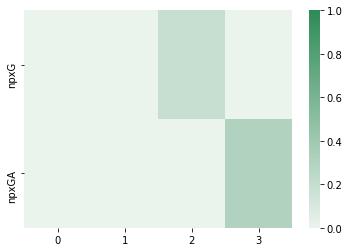

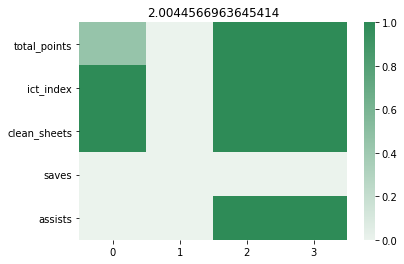

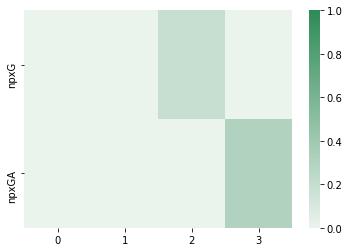

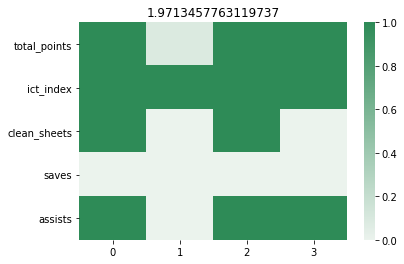

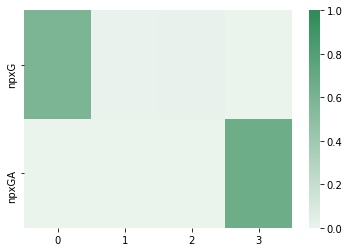

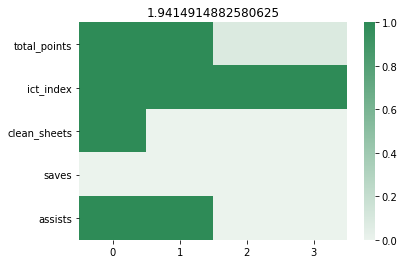

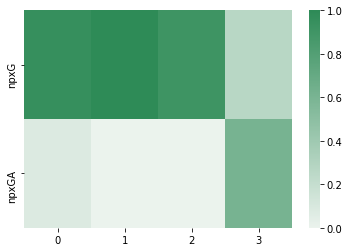

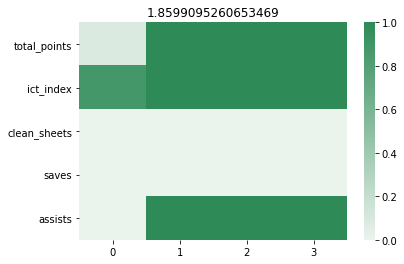

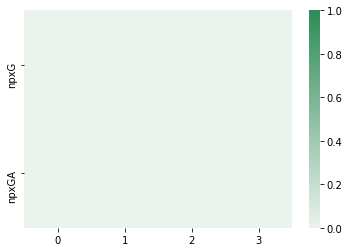

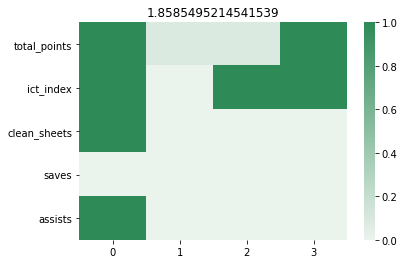

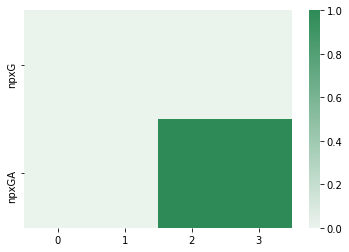

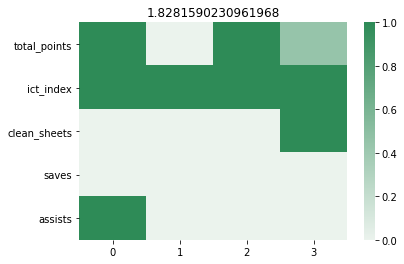

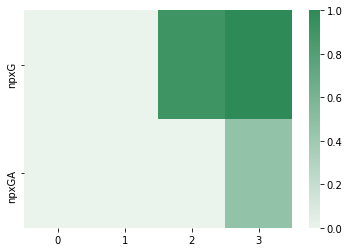

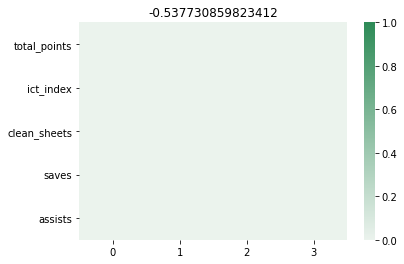

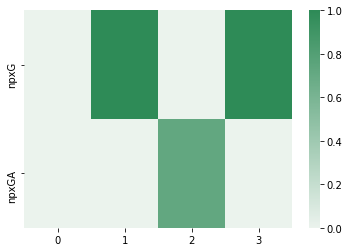

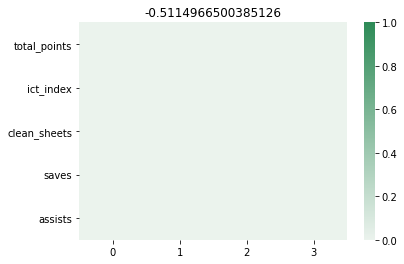

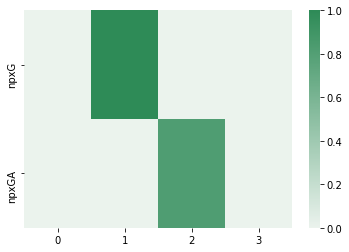

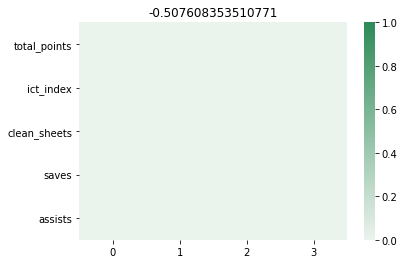

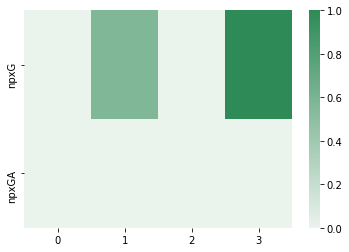

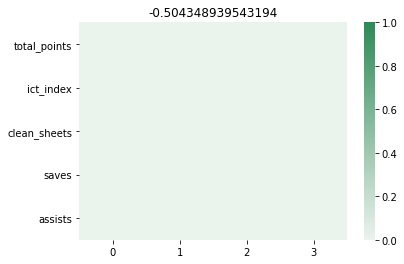

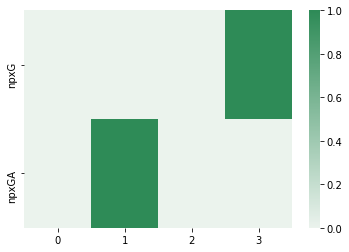

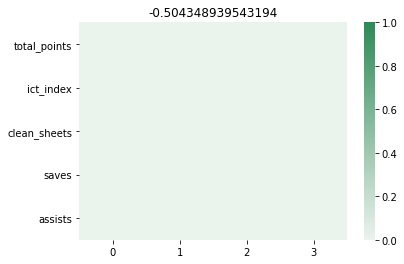

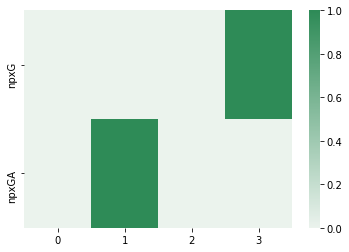

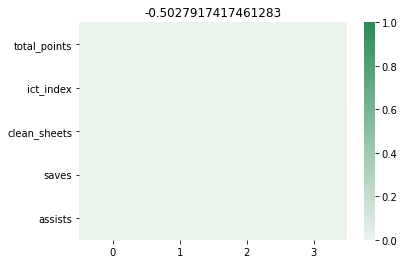

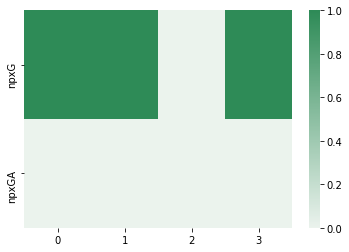

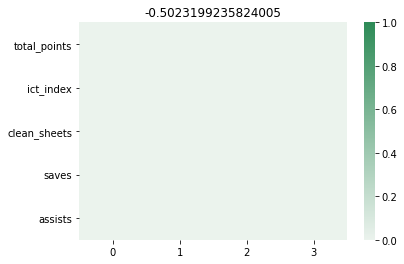

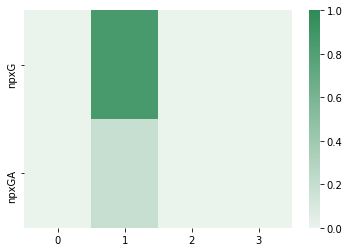

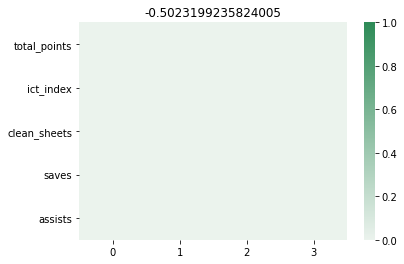

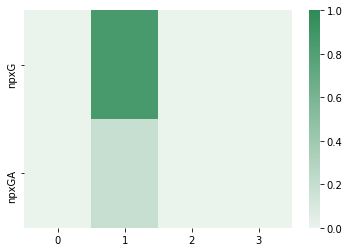

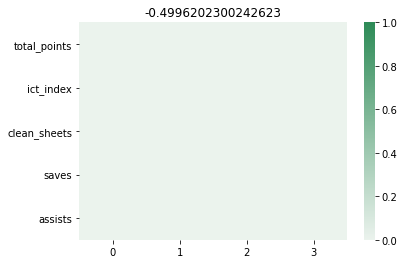

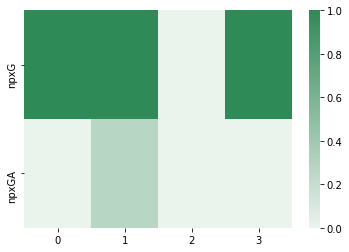

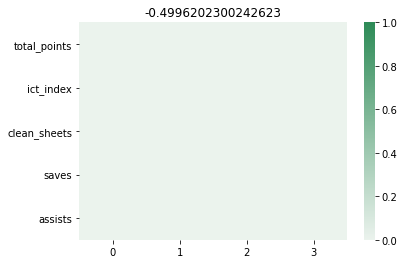

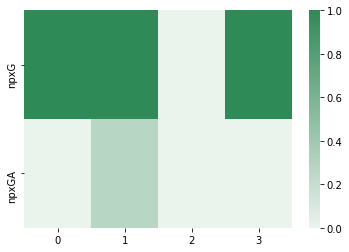

In [7]:
player_opponent_linear_score_model.visualize_predictions(test_loader)

torch.Size([3449, 20])


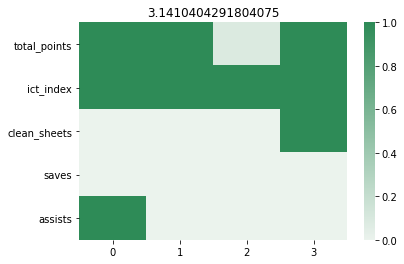

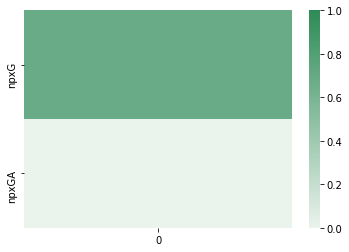

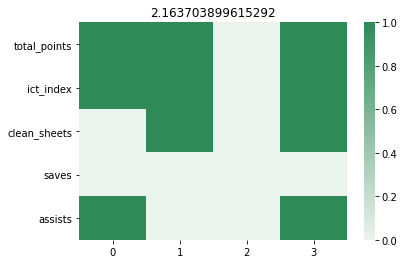

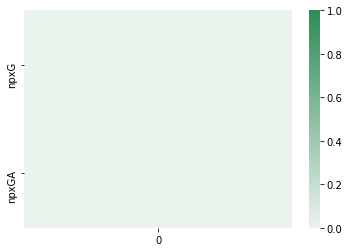

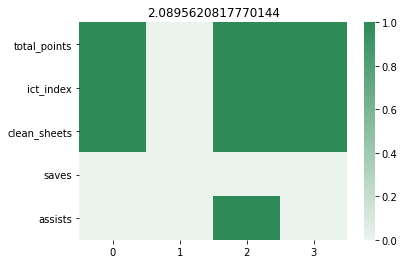

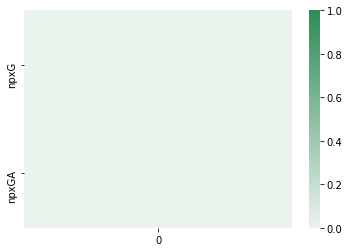

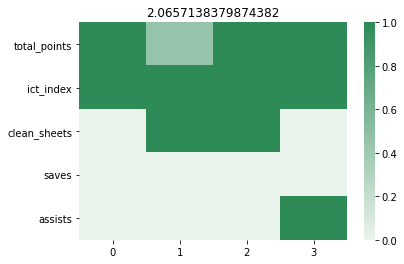

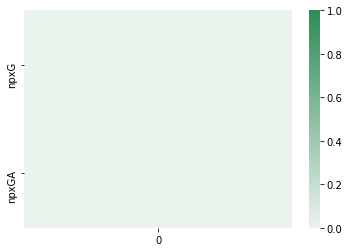

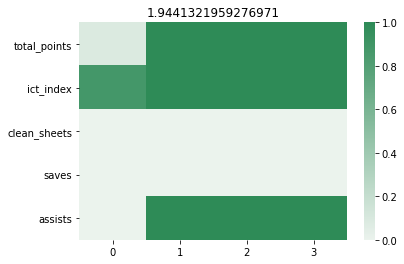

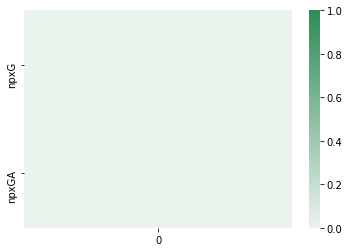

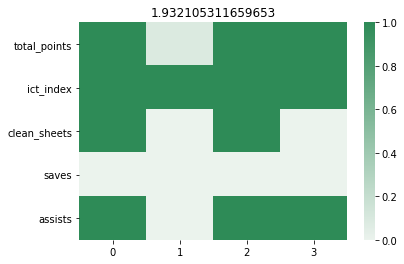

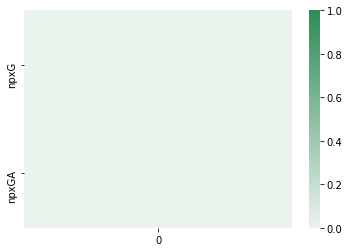

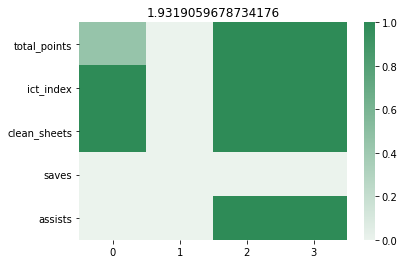

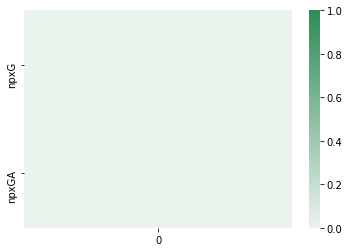

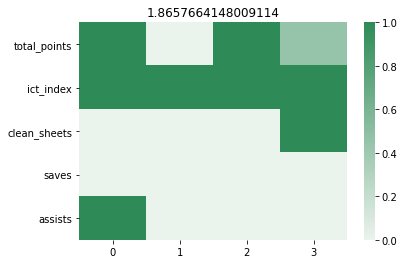

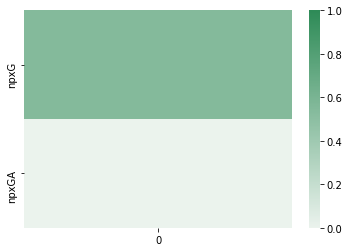

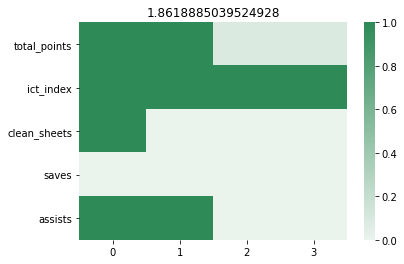

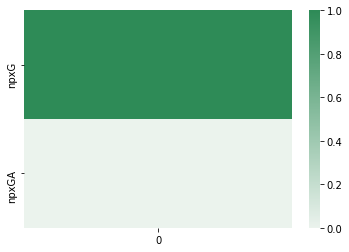

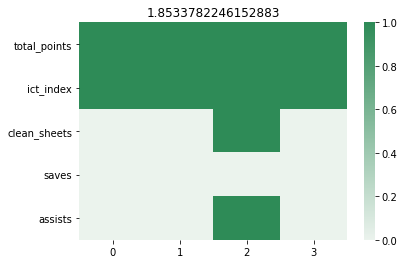

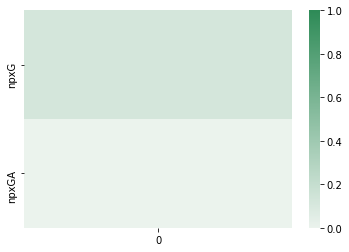

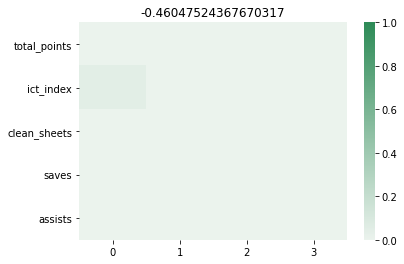

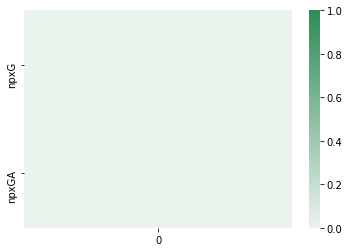

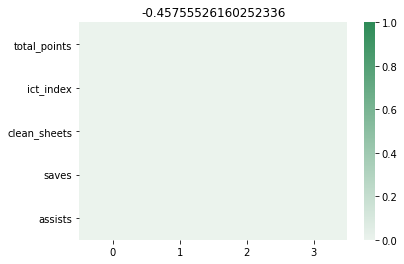

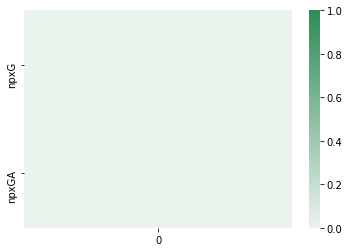

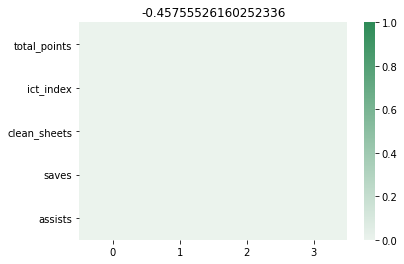

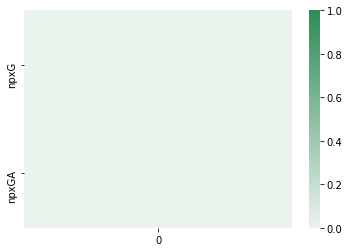

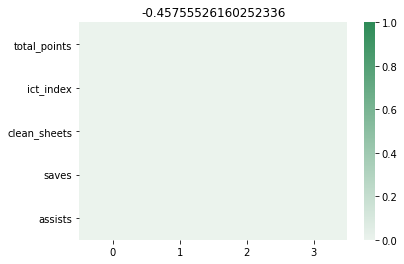

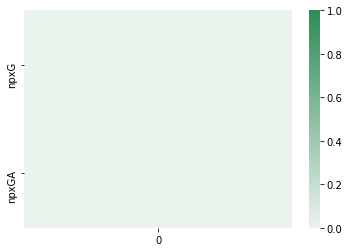

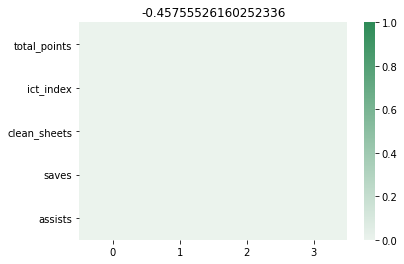

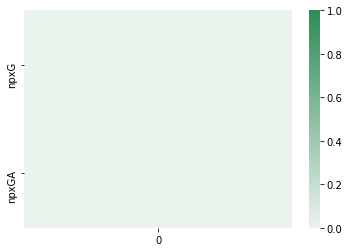

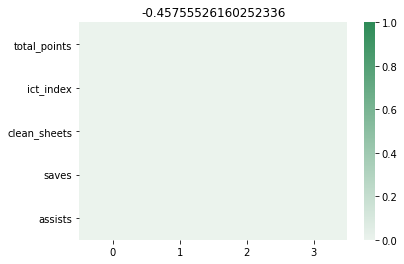

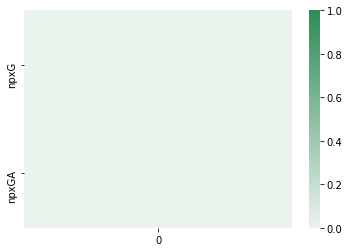

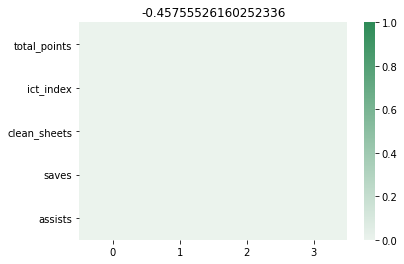

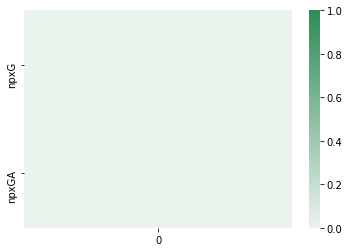

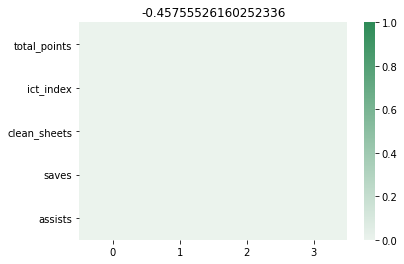

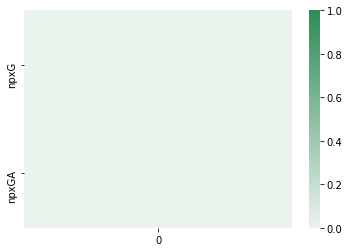

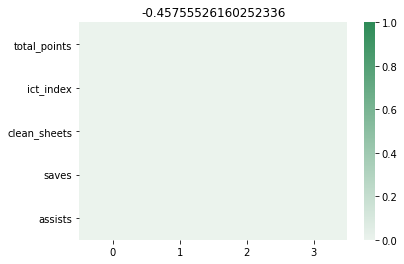

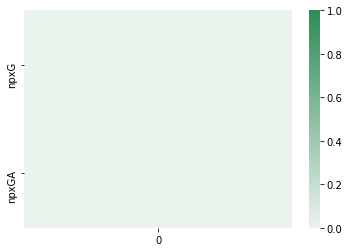

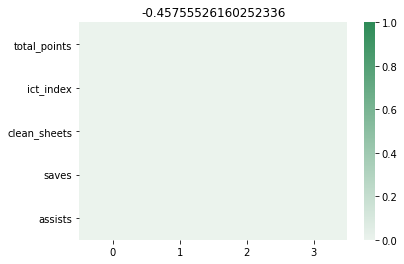

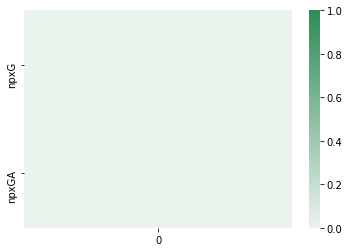

In [8]:
heirarchial_linear_model.visualize_predictions(test_loader)

In [10]:
list(heirarchial_linear_model.model.parameters())

[Parameter containing:
 tensor([[0.3130, 0.0072, 0.0193]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([-0.0787], dtype=torch.float64, requires_grad=True)]